### Installation of TensorFlow 2.0
First, check which version of TensorFlow that is installed.

In [ ]:
#This is to get the latest version of Tensorflow 2
# Tensorflow: Library for porcesing tensors (a.k.a. machine learning library)
%tensorflow_version 2.x 

#We get tensorflow to use it with the name "tf"
import tensorflow as tf; 

#When you use . (dot) you access the things from the import (eg: tf.__verstion__)
print("Tensorflow version " + tf.__version__)

Second, only if needed, install TensorFlow 2. NOTE that the following TensorFlow code works in TensorFlow version 1.13.1 to 2.2.0.

In [ ]:
if int(tf.__version__[0]) < 2:
  print("Tensorflow version 2.2 is installed to replace version " + tf.__version__)
  !pip install tensorflow==2.2.0-rc3
  print("Restart Runtime, e.g. by clicking on Restart runtime in Runtime menu.")

In [ ]:
# Numpy: python library for mathematical calculation
import numpy as np

# Keras (tensorflow.keras): High level interactive deep learning library to 
# use tensorflow easily and build models fast.

# Keras.Optimizers: optimizers to have effective learning in the 
# neural network
from tensorflow.keras import optimizers

# keras.preprocessing.image: code library to process images to feed the
# neural network
from tensorflow.keras.preprocessing import image

# keras.models.Sequential: Keras implementation of a sequential backbone
# for the deep learning model
# Sequential model: Deep learning model that uses layers in sequence to 
# process data and get a result
from tensorflow.keras.models import Sequential

# keras.layers: premade layers for a sequential learning model

# Dense: a layer of simple neurons
# Flatten: layer to make a 2D matrix into a 1D vector
from tensorflow.keras.layers import Dense, Flatten, Conv2D

# Utils: Keras general utilities
from tensorflow.keras import utils

# mnist: dataset of digits in 28 by 28 pictures
from tensorflow.keras.datasets import mnist

# matplotlib: code library to plot data
import matplotlib.pyplot as plt

# mnist.load_data(): get the data from the mnist dataset
# (train_data, train_labels): data for training the model
# (test_data, test_labels): data for testing accuracy of the model
# For machine learning models you need a set of data for training
# and a set of data to validate the training
(train_data, train_labels), (test_data,test_labels) = mnist.load_data()

### Preprocessing data and building model

Stack layers using [`Sequential()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) ans setup hyperparameters using [`model.compile()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile)

#### References for different types of layers

- [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
- [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

In [ ]:
# Np.expand_dims: We expand the 3D array into a 4D array
# to better fit the model
test_data = np.expand_dims(test_data, 3)
train_data = np.expand_dims(train_data, 3)

# utils.to_categorical(): change the values from numeral (eg. 5)
# to categorical vectors (eg. [0,0,0,0,0,1,0,0,0,0]) for the neural
# net 
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

# In this step we create the sequential model by bringing together many layers.
# First we set up two convolution layers
# The convolution layer is to filter the image and get picture-like features.
# Then we flatten the response from the last convolution
# Then we have a dense layer of neurons
# Finally we get our last layer which has 10 as an output given that there
# are 10 digits.

# The Rectified Linear Unit (Relu) activation function has proven to be very 
# effective, that's why it is mostly used throughout this process
# The last layer has a softmax activation function given that we want a list
# of probabilities to see what is the most probable digit
model = Sequential([
        Conv2D(64, kernel_size=(4,4), activation='relu', input_shape=(28,28,1)),
        Conv2D(50, kernel_size=(3,3), activation='relu'),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
        ])

# Now that we defined our model structure we compile with certain parameters.
# First, the adam (adaptive moment estimation) optimizer for the learning 
# algorithm
# Then, we set the loss function as "Categorical crossentropy" because we're
# dealing with categorical values (not continuous).
# The loss function is what tells the neural network at the time of learning
# how "far" is it from the answer.
# The metrics is for later use so that we know the accuracy of the model.
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
# We train the model using the data generated earlier
# making sure that our data is of the shape (x,28,28,1)

# We have 60 entries per batch
# We do 3 epochs to fit the data correclty to the network
model.fit(train_data, train_labels, batch_size=60, epochs=3, 
          validation_data=(test_data, test_labels))

In [ ]:
# We get a sample and plot it to see the prediction capability
# of our trained model
sample = np.random.randint(0, 10000)
picture = test_data[sample]
print(np.argmax(model.predict(np.array([picture]))[0]))
plt.imshow(picture.reshape((28,28)), cmap='gray')
plt.show()


### Save model

Once you finish the training, save your model for future use using [`model.save`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#save).

In [ ]:
model.save('MNIST_0.07_Winston_Bendana.h5')

### Load model

Use [`load_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) to load `.h5` files.

8


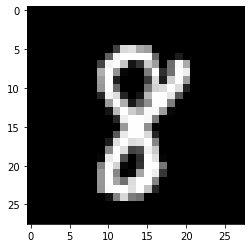

In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_data, train_labels), (test_data,test_labels) = mnist.load_data()
test_data = np.expand_dims(test_data, 3)
train_data = np.expand_dims(train_data, 3)
model = load_model('MNIST_0.07_Winston_Bendana.h5')
sample = np.random.randint(0, 10000)
picture = test_data[sample]
print(np.argmax(model.predict(np.array([picture]))[0]))
plt.imshow(picture.reshape((28,28)), cmap='gray')
plt.show()

In [ ]:
Video Link: https://youtu.be/zW8BLh84qw4